In [ ]:
# !pip install pykan
!pip install pykan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 kB 2.6 MB/s eta 0:00:00


In [ ]:
import torch
import matplotlib.pyplot as plt
from kan import KAN, create_dataset
from kan.MLP import MLP as kan_MLP
from kan.feynman import get_feynman_dataset

In [ ]:
torch.cuda.is_available()

False

In [ ]:
class MLP(kan_MLP):

    def __init__(self, width, act='silu', save_act=True, seed=0, device='cpu'):
        super(MLP, self).__init__()
        
        torch.manual_seed(seed)
        
        linears = []
        self.width = width
        self.depth = depth = len(width) - 1
        for i in range(depth):
            linears.append(torch.nn.Linear(width[i], width[i+1]))
        self.linears = torch.nn.ModuleList(linears)
        
        if act == 'silu':
            self.act_fun = torch.nn.SiLU()
        elif act == 'relu':
            self.act_fun = torch.nn.ReLU()
        elif act == 'tanh':
            self.act_fun = torch.nn.Tanh()
        
        self.save_act = save_act
        self.acts = None
        
        self.cache_data = None
        
        self.device = device
        self.to(device)

NameError: name 'kan_MLP' is not defined

## Tests with dataset I.6.20

### Initial testing

Dataset I.6.20 generated.
checkpoint directory created: ./model
saving model version 0.0
Starting training with grids: [3, 5, 10, 20, 50, 100, 200]
Training grid: 3


| train_loss: 3.47e-04 | test_loss: 3.85e-04 | reg: 7.98e+00 | : 100%|█| 200/200 [00:57<00:00,  3.47


saving model version 0.1
Grid: 3, Train RMSE: 3.4709e-04, Test RMSE: 3.8522e-04
saving model version 0.2
Training grid: 5


| train_loss: 2.16e-04 | test_loss: 2.39e-04 | reg: 7.60e+00 | : 100%|█| 200/200 [00:30<00:00,  6.53


saving model version 0.3
Grid: 5, Train RMSE: 2.1574e-04, Test RMSE: 2.3851e-04
saving model version 0.4
Training grid: 10


| train_loss: 1.50e-04 | test_loss: 1.74e-04 | reg: 7.46e+00 | : 100%|█| 200/200 [00:44<00:00,  4.49


saving model version 0.5
Grid: 10, Train RMSE: 1.5002e-04, Test RMSE: 1.7404e-04
saving model version 0.6
Training grid: 20


| train_loss: 6.49e-05 | test_loss: 1.04e-04 | reg: 9.16e+00 | : 100%|█| 200/200 [01:29<00:00,  2.24


saving model version 0.7
Grid: 20, Train RMSE: 6.4931e-05, Test RMSE: 1.0375e-04
saving model version 0.8
Training grid: 50


| train_loss: 4.39e-03 | test_loss: 1.99e-02 | reg: 8.48e+00 | : 100%|█| 200/200 [01:40<00:00,  1.99


saving model version 0.9
Grid: 50, Train RMSE: 4.3857e-03, Test RMSE: 1.9942e-02
saving model version 0.10
Training grid: 100


| train_loss: 1.88e-03 | test_loss: 2.21e-02 | reg: 8.49e+00 | : 100%|█| 200/200 [02:58<00:00,  1.12


saving model version 0.11
Grid: 100, Train RMSE: 1.8837e-03, Test RMSE: 2.2141e-02
saving model version 0.12
Training grid: 200


| train_loss: 1.52e-03 | test_loss: 2.60e-02 | reg: 8.51e+00 | : 100%|█| 200/200 [05:55<00:00,  1.78


saving model version 0.13
Grid: 200, Train RMSE: 1.5168e-03, Test RMSE: 2.5986e-02


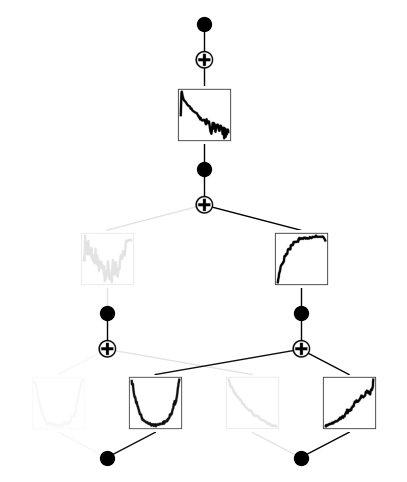

In [ ]:
# Set seed
seed = 42
torch.manual_seed(seed)
# 1. Get Feynman Dataset Info
dataset_name = 'I.6.20'
symbol, expr, f, ranges = get_feynman_dataset(dataset_name)
# 2. Create Dataset
# n_var is the number of input variables (len(ranges))
dataset = create_dataset(f, n_var=len(ranges), ranges=ranges, train_num=1000, test_num=1000, seed=seed)
print(f"Dataset {dataset_name} generated.")

# 3. Initialize KAN Model with coarse grid G=3

model = KAN(width=[len(ranges), 2, 1, 1], grid=3, k=3, seed=seed)

# 4. Train with Grid Extension (Paper Protocol)
# "increasing number of grid points every 200 steps to cover G = {3,5,10,20,50,100,200}"
grids = [3, 5, 10, 20, 50, 100, 200]
steps_per_grid = 200
print(f"Starting training with grids: {grids}")
for i, g in enumerate(grids):
    if i > 0:
        # Refine the grid to the new size 'g'
        # This returns a NEW model with finer grid, initialized from the old one
        model = model.refine(g)
    
    print(f"Training grid: {g}")
    # Train for 200 steps
    results = model.fit(dataset, opt="LBFGS", steps=steps_per_grid, lamb=0.0)
    
    print(f"Grid: {g}, Train RMSE: {results['train_loss'][-1]:.4e}, Test RMSE: {results['test_loss'][-1]:.4e}")
# 5. Plot final model
model.plot()
plt.show()

Dataset I.6.20 generated.
Using (2, 2, 1, 1) KAN
checkpoint directory created: ./model
saving model version 0.0
Starting training with grids: [3, 5, 10, 20, 50, 100, 200]
Training grid: 3


| train_loss: 2.09e-03 | test_loss: 2.11e-03 | reg: 8.52e+00 | : 100%|█| 200/200 [06:35<00:00,  1.98


saving model version 0.1
Grid: 3, Train RMSE: 2.0906e-03, Test RMSE: 2.1050e-03
saving model version 0.2
Training grid: 5


| train_loss: 1.16e-03 | test_loss: 1.17e-03 | reg: 8.45e+00 | : 100%|█| 200/200 [07:08<00:00,  2.14


saving model version 0.3
Grid: 5, Train RMSE: 1.1561e-03, Test RMSE: 1.1689e-03
saving model version 0.4
Training grid: 10


| train_loss: 4.70e-04 | test_loss: 4.82e-04 | reg: 7.86e+00 | : 100%|█| 200/200 [08:37<00:00,  2.59


saving model version 0.5
Grid: 10, Train RMSE: 4.7036e-04, Test RMSE: 4.8189e-04
saving model version 0.6
Training grid: 20


| train_loss: 3.25e-04 | test_loss: 3.38e-04 | reg: 7.84e+00 | : 100%|█| 200/200 [11:14<00:00,  3.37


saving model version 0.7
Grid: 20, Train RMSE: 3.2534e-04, Test RMSE: 3.3790e-04
saving model version 0.8
Training grid: 50


| train_loss: 2.44e-04 | test_loss: 2.53e-04 | reg: 7.92e+00 | : 100%|█| 200/200 [20:01<00:00,  6.01


saving model version 0.9
Grid: 50, Train RMSE: 2.4385e-04, Test RMSE: 2.5270e-04
saving model version 0.10
Training grid: 100


| train_loss: 2.38e-04 | test_loss: 2.51e-04 | reg: 7.92e+00 | : 100%|█| 200/200 [15:52<00:00,  4.76


saving model version 0.11
Grid: 100, Train RMSE: 2.3789e-04, Test RMSE: 2.5056e-04
saving model version 0.12
Training grid: 200


| train_loss: 2.31e-04 | test_loss: 2.56e-04 | reg: 7.92e+00 | : 100%|█| 200/200 [28:40<00:00,  8.60


saving model version 0.13
Grid: 200, Train RMSE: 2.3127e-04, Test RMSE: 2.5642e-04


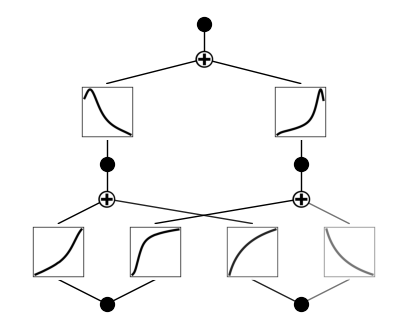

In [ ]:
import torch
import matplotlib.pyplot as plt
from kan import KAN, create_dataset
from kan.feynman import get_feynman_dataset
# Set seed
seed = 42
torch.manual_seed(seed)
# 1. Get Feynman Dataset Info
dataset_name = 'I.6.20'
symbol, expr, f, ranges = get_feynman_dataset(dataset_name)
# 2. Create Dataset
# n_var is the number of input variables (len(ranges))
dataset = create_dataset(f, n_var=len(ranges), ranges=ranges, train_num=15000, test_num=15000, seed=seed)
print(f"Dataset {dataset_name} generated.")

# 3. Initialize KAN Model with coarse grid G=3

print(f'Using {len(ranges), 2, 1, 1} KAN')
model = KAN(width=[len(ranges), 2, 1], grid=3, k=3, seed=seed)

# 4. Train with Grid Extension (Paper Protocol)
# "increasing number of grid points every 200 steps to cover G = {3,5,10,20,50,100,200}"
grids = [3, 5, 10, 20, 50, 100, 200]
steps_per_grid = 200
print(f"Starting training with grids: {grids}")
for i, g in enumerate(grids):
    if i > 0:
        # Refine the grid to the new size 'g'
        # This returns a NEW model with finer grid, initialized from the old one
        model = model.refine(g)
    
    print(f"Training grid: {g}")
    # Train for 200 steps
    results = model.fit(dataset, opt="LBFGS", steps=steps_per_grid, lamb=0.0)
    
    print(f"Grid: {g}, Train RMSE: {results['train_loss'][-1]:.4e}, Test RMSE: {results['test_loss'][-1]:.4e}")
# 5. Plot final model
model.plot()
plt.show()

Dataset I.6.20 generated.
Using (2, 2, 1, 1) KAN
checkpoint directory created: ./model
saving model version 0.0
Dataset moved to CUDA.
Starting training with grids: [3, 5, 10, 20, 50, 100, 200]
Training grid: 3


description:   0%|                                                          | 0/200 [00:00<?, ?it/s]

| train_loss: 1.69e-03 | test_loss: 1.68e-03 | reg: 8.37e+00 | : 100%|█| 200/200 [00:46<00:00,  4.34


saving model version 0.1
Grid: 3, Train RMSE: 1.6873e-03, Test RMSE: 1.6785e-03
saving model version 0.2
Training grid: 5


| train_loss: 1.32e-03 | test_loss: 1.38e-03 | reg: 8.48e+00 | : 100%|█| 200/200 [00:44<00:00,  4.54


saving model version 0.3
Grid: 5, Train RMSE: 1.3249e-03, Test RMSE: 1.3831e-03
saving model version 0.4
Training grid: 10


| train_loss: 4.60e-04 | test_loss: 4.99e-04 | reg: 8.41e+00 | : 100%|█| 200/200 [00:35<00:00,  5.68


saving model version 0.5
Grid: 10, Train RMSE: 4.6021e-04, Test RMSE: 4.9874e-04
saving model version 0.6
Training grid: 20


| train_loss: 2.25e-04 | test_loss: 3.25e-04 | reg: 8.44e+00 | : 100%|█| 200/200 [00:24<00:00,  8.07


saving model version 0.7
Grid: 20, Train RMSE: 2.2455e-04, Test RMSE: 3.2521e-04
saving model version 0.8
Training grid: 50


| train_loss: 1.16e-04 | test_loss: 2.74e-04 | reg: 8.44e+00 | : 100%|█| 200/200 [00:29<00:00,  6.74


saving model version 0.9
Grid: 50, Train RMSE: 1.1637e-04, Test RMSE: 2.7409e-04
saving model version 0.10
Training grid: 100


| train_loss: 8.90e-05 | test_loss: 2.84e-04 | reg: 8.44e+00 | : 100%|█| 200/200 [00:20<00:00,  9.65


saving model version 0.11
Grid: 100, Train RMSE: 8.9032e-05, Test RMSE: 2.8356e-04
saving model version 0.12
Training grid: 200


| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 200/200 [00:41<00:00,  4.79it/s]


saving model version 0.13
Grid: 200, Train RMSE: nan, Test RMSE: nan


ValueError: alpha (nan) is outside 0-1 range

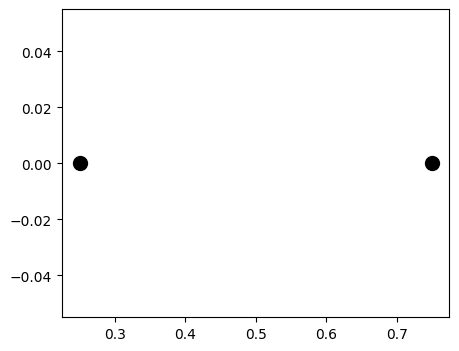

In [ ]:
import torch
import matplotlib.pyplot as plt
from kan import KAN, create_dataset
from kan.feynman import get_feynman_dataset
# Set seed
seed = 42
torch.manual_seed(seed)
# 1. Get Feynman Dataset Info
dataset_name = 'I.6.20'
symbol, expr, f, ranges = get_feynman_dataset(dataset_name)
# 2. Create Dataset
# n_var is the number of input variables (len(ranges))
dataset = create_dataset(f, n_var=len(ranges), ranges=ranges, train_num=1000, test_num=1000, seed=seed)
print(f"Dataset {dataset_name} generated.")

# 3. Initialize KAN Model with coarse grid G=3

print(f'Using {len(ranges), 2, 1, 1} KAN')
model = KAN(width=[len(ranges), 2, 1], grid=3, k=3, seed=seed)
model.to('cuda')
dataset['train_input'] = dataset['train_input'].to('cuda')
dataset['train_label'] = dataset['train_label'].to('cuda')
dataset['test_input'] = dataset['test_input'].to('cuda')
dataset['test_label'] = dataset['test_label'].to('cuda')
print("Dataset moved to CUDA.")


# 4. Train with Grid Extension (Paper Protocol)
# "increasing number of grid points every 200 steps to cover G = {3,5,10,20,50,100,200}"
grids = [3, 5, 10, 20, 50, 100, 200]
steps_per_grid = 200
print(f"Starting training with grids: {grids}")
for i, g in enumerate(grids):
    if i > 0:
        # Refine the grid to the new size 'g'
        # This returns a NEW model with finer grid, initialized from the old one
        model = model.refine(g)
    
    print(f"Training grid: {g}")
    # Train for 200 steps
    results = model.fit(dataset, opt="LBFGS", steps=steps_per_grid, lamb=0.0)
    
    print(f"Grid: {g}, Train RMSE: {results['train_loss'][-1]:.4e}, Test RMSE: {results['test_loss'][-1]:.4e}")
# 5. Plot final model
model.plot()
plt.show()

### Testing prunning

Dataset symbols: (theta, sigma)
checkpoint directory created: ./model
saving model version 0.0
Starting training with grids: [3, 5, 10, 20]
Training grid: 3


| train_loss: 1.17e-01 | test_loss: 1.10e-01 | reg: 6.92e-01 | : 100%|█| 100/100 [00:28<00:00,  3.45


saving model version 0.1
Grid: 3, Train RMSE: 1.1745e-01, Test RMSE: 1.1012e-01
saving model version 0.2
Training grid: 5


| train_loss: 1.17e-01 | test_loss: 1.20e-01 | reg: 3.66e+00 | : 100%|█| 100/100 [00:47<00:00,  2.12


saving model version 0.3
Grid: 5, Train RMSE: 1.1680e-01, Test RMSE: 1.2022e-01
saving model version 0.4
Training grid: 10


| train_loss: 1.13e-01 | test_loss: 1.72e-01 | reg: 2.63e+00 | : 100%|█| 100/100 [00:42<00:00,  2.38


saving model version 0.5
Grid: 10, Train RMSE: 1.1327e-01, Test RMSE: 1.7242e-01
saving model version 0.6
Training grid: 20


| train_loss: 1.83e-01 | test_loss: 2.38e-01 | reg: 5.01e+00 | : 100%|█| 100/100 [01:02<00:00,  1.60


saving model version 0.7
Grid: 20, Train RMSE: 1.8348e-01, Test RMSE: 2.3839e-01


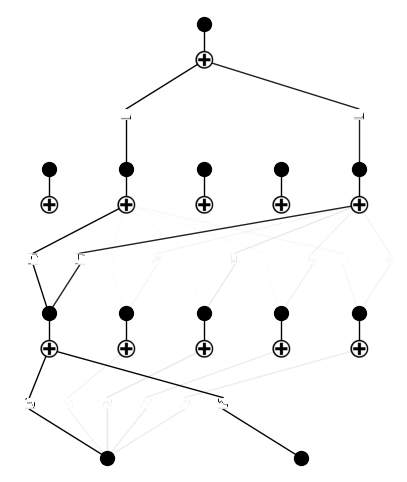

In [ ]:
seed = 171
dataset_name = 'I.6.20'
symbol, expr, f, ranges = get_feynman_dataset(dataset_name)
print(f"Dataset symbols: {symbol}")
# 2. Create Dataset
# n_var is the number of input variables (len(ranges))
dataset = create_dataset(f, n_var=len(ranges), ranges=ranges, train_num=500, test_num=500, seed=seed)


# 3. Initialize KAN Model with coarse grid G=3
width = [len(ranges), 5, 5, 1]
model = KAN(width=width, grid=3, k=3, seed=seed)

# 4. Train with Grid Extension (Paper Protocol)
# "increasing number of grid points every 200 steps to cover G = {3,5,10,20,50,100,200}"
grids = [3, 5, 10, 20]
steps_per_grid = 100
print(f"Starting training with grids: {grids}")
for i, g in enumerate(grids):
    if i > 0:
        # Refine the grid to the new size 'g'
        # This returns a NEW model with finer grid, initialized from the old one
        model = model.refine(g)
    
    print(f"Training grid: {g}")
    # Train for 200 steps
    results = model.fit(dataset, opt="LBFGS", steps=steps_per_grid, lamb=1e-2)
    
    print(f"Grid: {g}, Train RMSE: {results['train_loss'][-1]:.4e}, Test RMSE: {results['test_loss'][-1]:.4e}")
# 5. Plot final model
model.plot()
plt.show()

In [ ]:
model = model.prune(1e-2)

saving model version 0.10


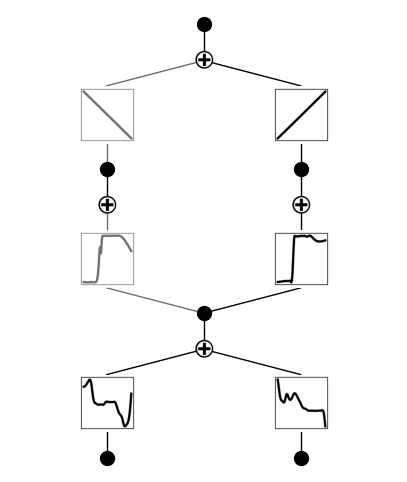

In [ ]:
model.plot()

In [ ]:
model.evaluate(dataset)

{'test_loss': 0.30853909254074097, 'n_edge': 6, 'n_grid': 20}

In [ ]:
model.fit(dataset, opt="LBFGS", steps=100)

| train_loss: 8.41e-02 | test_loss: 1.20e-01 | reg: 8.30e+00 | : 100%|█| 100/100 [00:32<00:00,  3.10

saving model version 0.11


{'train_loss': [array(0.2881325, dtype=float32),
  array(0.28688082, dtype=float32),
  array(0.2862275, dtype=float32),
  array(0.28579137, dtype=float32),
  array(0.2855391, dtype=float32),
  array(0.25307894, dtype=float32),
  array(0.24682917, dtype=float32),
  array(0.23696461, dtype=float32),
  array(0.22966692, dtype=float32),
  array(0.22567141, dtype=float32),
  array(0.16169867, dtype=float32),
  array(0.14484866, dtype=float32),
  array(0.13796763, dtype=float32),
  array(0.1341562, dtype=float32),
  array(0.125745, dtype=float32),
  array(0.13489938, dtype=float32),
  array(0.12330223, dtype=float32),
  array(0.11722546, dtype=float32),
  array(0.11517485, dtype=float32),
  array(0.11190354, dtype=float32),
  array(0.11484651, dtype=float32),
  array(0.11253449, dtype=float32),
  array(0.10906837, dtype=float32),
  array(0.10679381, dtype=float32),
  array(0.10518655, dtype=float32),
  array(0.10493144, dtype=float32),
  array(0.10341242, dtype=float32),
  array(0.10283092, 

### Test MLP model

In [ ]:
dataset = create_dataset(f, n_var=len(ranges), ranges=ranges, train_num=1000, test_num=1000, seed=30)

In [ ]:
model = new_MLP(width=[2, 5, 5, 5, 5, 1], act='tanh', seed=30, device='cpu')
results = model.fit(dataset, steps=600, opt="LBFGS")

| train_loss: 6.31e-04 | test_loss: 6.54e-04 | reg: 7.54e+01 | : 100%|█| 600/600 [00:27<00:00, 21.91


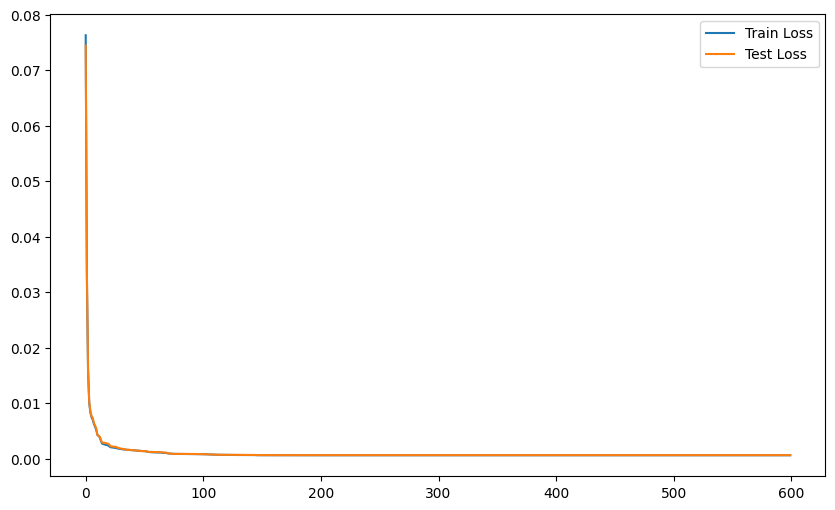

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(results['train_loss'], label='Train Loss')
plt.plot(results['test_loss'], label='Test Loss')
plt.legend()
plt.show()

### Experiment Functions

In [ ]:
def run_kan_feynman(dataset: str,
                          shape: list[int],
                          samples: int, # samples for both train and test (separated) sets
                          start_grid: int = 3,
                          k: int = 3,
                          device='cuda' if torch.cuda.is_available() else 'cpu',
                          seed=42,
                          grids=[3, 5, 10, 20, 50, 100, 200],
                          steps_per_grid=200,
                          plot_model=True,
                          prune=False,
                          prune_threshold=1e-2,
                          steps_after_prune=200,
                          lamb=0.00,
                          opt="LBFGS",
                          verbose=True):
    
    if isinstance(seed, list):
        all_results = []
        for s in seed:
            model, per_grid_results, best_test_rmse = run_kan_feynman(dataset=dataset,
                                                                           shape=shape,
                                                                           samples=samples,
                                                                           start_grid=start_grid,
                                                                           k=k,
                                                                           device=device,
                                                                           seed=s,
                                                                           grids=grids,
                                                                           steps_per_grid=steps_per_grid,
                                                                           plot_model=plot_model,
                                                                           prune=prune,
                                                                           prune_threshold=prune_threshold,
                                                                           steps_after_prune=steps_after_prune,
                                                                           lamb=lamb,
                                                                           opt=opt)
            all_results.append((model, per_grid_results, best_test_rmse))
        return all_results


    assert device in ['cpu', 'cuda']
    # torch.manual_seed(seed)

    
    try:
        symbol, expr, f, ranges = get_feynman_dataset(dataset)
    except ValueError:
        raise ValueError("Invalid dataset name")

    dataset = create_dataset(f, n_var=len(ranges), ranges=ranges, train_num=samples, test_num=samples, seed=seed)


    dataset['train_input'] = dataset['train_input'].to(device)
    dataset['train_label'] = dataset['train_label'].to(device)
    dataset['test_input'] = dataset['test_input'].to(device)
    dataset['test_label'] = dataset['test_label'].to(device)

    # assert shape[0] == len(ranges), "Input dimension does not match number of variables in dataset"
    if not shape[-1] == 1:
        print(f"Warning: Output dimension {shape[-1]} is not 1. Forcing condition.")
        shape[-1] = 1
    if not shape[0] == len(ranges):
        print(f"Warning: Input dimension {shape[0]} does not match number of variables in dataset {len(ranges)}. Forcing condition.")
        shape[0] = len(ranges)

    model = KAN(width=shape, grid=start_grid, k=k, seed=seed).to(device)

    per_grid_results = {}

    for i, g in enumerate(grids):
        if i > 0: #skip first iteration
            model = model.refine(g)
        
        print(f"Training grid: {g}")
        results = model.fit(dataset, opt=opt, steps=steps_per_grid, lamb=lamb) #, verbose=verbose)
        per_grid_results[g] = results

    if prune:
        print("Pruning model...")
        model = model.prune(prune_threshold)
        results = model.fit(dataset, opt=opt, steps=steps_after_prune, lamb=lamb) #, verbose=verbose)
        per_grid_results['prunning'] = results
        

    if plot_model:
        model.plot()
        plt.show()

    best_test_rmse = min(per_grid_results.values(), key=lambda x: x['test_loss'][-1])['test_loss'][-1]
    
    return model, per_grid_results, best_test_rmse

In [ ]:
def sweep_kan_feynman(dataset:str, width: int=5, depths=[2,3,4,5,6], **kwargs):

    per_depth_results = {}
    per_depth_models = {}
    best_test_rmse = float('inf')

    for depth in depths:
        shape = [width for _ in range(depth)]
        results = run_kan_feynman(dataset=dataset, shape=shape, **kwargs)
            
        if isinstance(results, list):
            # used multiple seeds - take best rmse from different seeds
            test_rmse = min([res[2] for res in results])
            per_grid_results = [res[1] for res in results]
            model = [res[0] for res in results]
        else:
            model, per_grid_results, test_rmse = results


        if test_rmse < best_test_rmse:
            best_test_rmse = test_rmse

        per_depth_results[depth] = per_grid_results
        per_depth_models[depth] = model

    return per_depth_models, per_depth_results, best_test_rmse

In [ ]:
def get_smallest_shape(results, rmse_threshold:float=1e-2):
    pass


def get_shape_best_loss(results):
    pass

In [ ]:
def feynman_human_kan_experiment(dataset: str, seeds: int| list[int] = [42, 171, 3], samples: int = 5000):
    """
    Run feynman dataset experiment with human-constructed KAN
    """
    results = run_kan_feynman(dataset=dataset,
                             seed=seeds,
                             samples=samples)
    
    if isinstance(results, list):
        best_test_rmse = min([res[2] for res in results])
    else:
        best_test_rmse = results[2]

    print('==='*20)
    print(f'Best Test RMSE for human-constructed KAN on dataset {dataset}: {best_test_rmse:.4e}')

    return results
    

def feunman_not_pruned_kan_experiment(dataset: str, seeds: int | list[int], samples=500):

    results = run_kan_feynman(dataset=dataset,
                            seed=seeds,
                            samples=samples,
                            prune=False)

    print('==='*20)
    print(f'Best Test RMSE for not pruned KAN on dataset {dataset}: {results[2]:.4e}')
    return results


def feynman_pruned_kan_experiment(dataset: str, seeds: int|list[int] = [42, 171, 3], samples: int = 1000, steps_after_prune: int = 100,  lamb=1e-2, **kwargs):
    """
    Run feynman dataset experiment with pruned KAN
    """
    results = sweep_kan_feynman(dataset=dataset,
                                seed=seeds,
                                samples=samples,
                                prune=True,
                                prune_threshold=0.01,
                                steps_after_prune=steps_after_prune,
                                lamb=lamb,
                                **kwargs)

    return results
    

    smalles_shape = get_smallest_shape(results, rmse_threshold=1e-2)
    shape_best_loss = get_shape_best_loss(results)

    best_test_rmse = results[2]

    print('==='*20)
    print(f'Smallest shape achieving RMSE < 1e-2 on dataset {dataset}: {smalles_shape}')
    print(f'Shape achieving best loss on dataset {dataset}: {shape_best_loss}')
    print(f'Best Test RMSE for pruned KAN on dataset {dataset}: {best_test_rmse:.4e}')

    return results


In [ ]:
def feynman_mlp_experiment(dataset: str, seeds: int|list[int] = [42, 171, 3], samples: int = 1000, device='cuda' if torch.cuda.is_available() else 'cpu',
                           activations=['silu', 'relu', 'tanh'], depths = [2,3,4,5,6], steps=1400, lr=1):
    """
    Run feynman dataset experiment with MLP
    """

    assert device in ['cpu', 'cuda']

    all_results = {}
    best_test_rmse = float('inf')

    try:
        symbol, expr, f, ranges = get_feynman_dataset(dataset)
    except ValueError:
        raise ValueError("Invalid dataset name")
    
    for seed in seeds:
        try:
            torch.manual_seed(seed)
        except Exception as e:
            print(f"Warning: could not set seed due to error: {e}")

        dataset = create_dataset(f, n_var=len(ranges), ranges=ranges, train_num=samples, test_num=samples, seed=seed)
        dataset['train_input'] = dataset['train_input'].to(device)
        dataset['train_label'] = dataset['train_label'].to(device)
        dataset['test_input'] = dataset['test_input'].to(device)
        dataset['test_label'] = dataset['test_label'].to(device)

        all_results[seed] = {}
        
        for depth in depths:
            shape = [len(ranges)] + [5 for _ in range(depth-2)] + [1]

            all_results[seed][depth] = {}

            for act in activations:
                model = MLP(width=shape, act=act, seed=seed, device=device)

                results = model.fit(dataset=dataset, steps=steps, opt="LBFGS", lr=lr)
                all_results[seed][depth][act] = results

                test_rmse = min(results['test_loss'])

                if test_rmse < best_test_rmse:
                    best_test_rmse = test_rmse
                
    return all_results, best_test_rmse

In [ ]:
results, best_rmse = feynman_mlp_experiment(dataset='I.6.20', seeds=[42, 171, 3], samples=1000, device='cpu')

| train_loss: 7.22e-02 | test_loss: 7.17e-02 | reg: 1.46e+00 | : 100%|█| 1400/1400 [00:28<00:00, 49.
| train_loss: 7.22e-02 | test_loss: 7.17e-02 | reg: 1.46e+00 | : 100%|█| 1400/1400 [00:28<00:00, 48.
| train_loss: 7.22e-02 | test_loss: 7.17e-02 | reg: 1.46e+00 | : 100%|█| 1400/1400 [00:28<00:00, 49.
| train_loss: 1.32e-02 | test_loss: 1.32e-02 | reg: 2.86e+01 | : 100%|█| 1400/1400 [00:38<00:00, 36.
| train_loss: 1.31e-02 | test_loss: 1.31e-02 | reg: 2.82e+01 | : 100%|█| 1400/1400 [00:43<00:00, 32.
| train_loss: 1.30e-02 | test_loss: 1.30e-02 | reg: 2.72e+01 | : 100%|█| 1400/1400 [00:37<00:00, 37.
| train_loss: nan | test_loss: nan | reg: nan | : 100%|█████████| 1400/1400 [01:49<00:00, 12.76it/s]
| train_loss: 1.19e-03 | test_loss: 1.32e-03 | reg: 4.99e+01 | : 100%|█| 1400/1400 [00:51<00:00, 27.
| train_loss: 1.12e-03 | test_loss: 1.18e-03 | reg: 4.92e+01 | : 100%|█| 1400/1400 [00:57<00:00, 24.
| train_loss: 5.56e-04 | test_loss: 7.10e-04 | reg: 7.33e+01 | : 100%|█| 1400/1400 [00:51<0

In [ ]:
print(f'Best RMSE achieved: {best_rmse:.4e}')

Best RMSE achieved: 3.7509e-04


In [ ]:
def feynman_dataset_experiment(dataset: str):
    pass

In [ ]:
kan1 = KAN(width=[5,5,1])


kan2 = KAN(width=[3,3,3,1])

print(sum(s[0] for s in kan1.width), sum(s[0] for s in kan2.width))

print(sum(p.numel() for p in kan1.parameters()),  sum(p.numel() for p in kan2.parameters()))

checkpoint directory created: ./model
saving model version 0.0
checkpoint directory created: ./model
saving model version 0.0
11 10
544 412


## Experiments

In [ ]:
results = feynman_pruned_kan_experiment(dataset='I.6.20', samples=1000, seeds=[1,2], grids=[3,5], steps_per_grid=50, steps_after_prune=20, depths=[2,3])